 1


<IPython.core.display.Latex object>

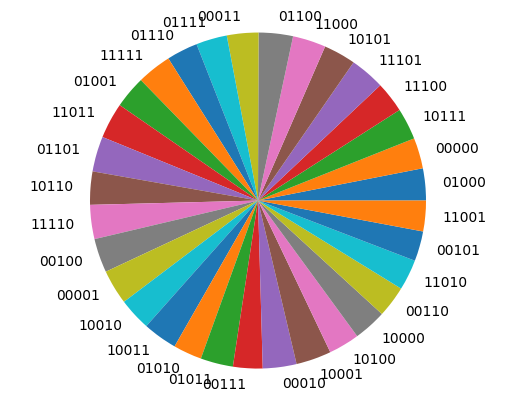

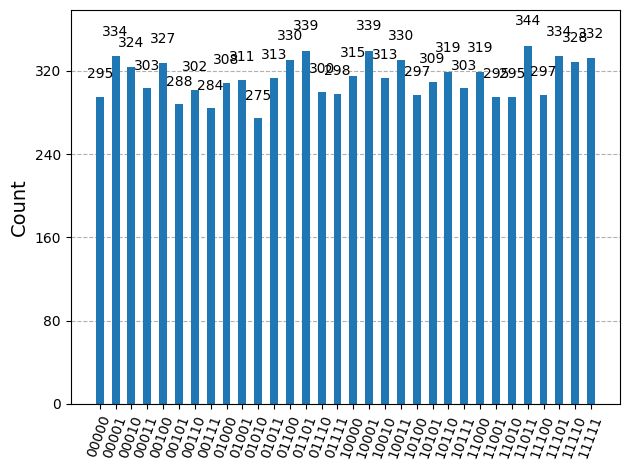

In [50]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from IPython.display import display,Latex
import ipywidgets as widget

def ZOR(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    qc.mcp(pi, list(range(n - 1)), n - 1)
    qc.x(range(n))
    qc.h(range(n))
    return qc

def ZF(n):
    qc = QuantumCircuit(n)
    # Let us Assume Target State is 01010
    qc.x(0)
    qc.x(2)
    qc.x(4)
    qc.mcp(pi, [0,1,2,3], 4)
    qc.x(4)
    qc.x(2)
    qc.x(0)
    return qc

n = 5
grovercirc = QuantumCircuit(n)
grovercirc.h(range(n)) 


zorgate = ZOR(n)
zfgate = ZF(n)
x = int(input())
for i in range(x):
    grovercirc.append(zorgate, range(n))
    grovercirc.append(zfgate, range(n))

grovercirc.measure_all()

sim = AerSimulator()
t_qc = transpile(grovercirc, sim)
counts = sim.run(t_qc, shots=10000).result().get_counts()
labels = list(counts.keys())
sizes = list(counts.values())
plt.pie(sizes, labels=labels)
plt.axis('equal')
strm = max(counts,key=counts.get)
display(Latex(f"Key Binary Strings Are {strm}"))
plt.show()
plot_histogram(counts)